In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('car_price.csv')
A = data[['km_driven', 'year', 'mileage', 'engine', 'max_power', 'owner', 'fuel', 'seller_type', 'transmission', 'selling_price']]
A = A.replace(['First Owner', 'Second Owner', 'Third Owner','Fourth & Above Owner', 'Test Drive Car'], ['1', '0.75', '0.5', '0.25', '0'])
A = A.replace(['Petrol', 'Diesel', 'LPG', 'CNG'], ['1', '0.75', '0.5', '0.25'])
A = A.replace(['Dealer', 'Individual', 'Trustmark Dealer'], ['1', '0.66','0.33'])
A = A.replace(['Automatic', 'Manual'], ['1', '0.5'])
A['engine'] = A.engine.str.replace(' CC', '0')
A['mileage'] = A.mileage.str.replace(' kmpl', '0')
A['mileage'] = A.mileage.str.replace(' km/kg', '0')
A['max_power'] = A.max_power.str.replace(' bhp', '0')
listS = ['km_driven', 'year', 'mileage', 'engine', 'max_power', 'owner', 'fuel', 'seller_type', 'transmission', 'selling_price']
for idk in listS:
    A[idk] = A[idk].astype('float64')      # replacing NaN values
    A[idk] = A[idk].fillna(A[idk].mean())
matrix = np.array(A.values, 'float64')
X1 = matrix[:, (0,1,2,3,4,5,6,7,8)]   
y = matrix[:, 9]                      # selling price
for i in range(0,5):
    X1[:,i] = X1[:,i]/(np.max(X1[:, i]))   #normalisation
m = np.size(y)
X1 = X1.reshape([X1[:,0].size, 9])
x = np.hstack([np.ones((X1[:,0].size, 1)), X1])
theta = np.zeros((10,1))
temp = np.zeros((10,1))
iters = np.ones((2000,1))
def gradient(x, y, theta):
    alpha = 0.0000001
    iteration = 2000
    # gradient descend 
    J_history = np.zeros([iteration, 1], dtype = 'float64')

    for iter in range(0, iteration):
        error = (x @ theta) - y
        for j in range(0,10):
            temp[j] = theta[j] - ((alpha / m) * np.sum(error * x[:, j]))

        theta = temp
        J_history[iter] = (1 / (2 * m)) * (np.sum(((x @ theta) - y) ** 2))
        iters[iter] = iter
    return theta, J_history

theta, loss = gradient(x, y, theta)

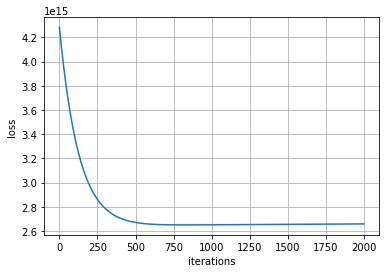

In [3]:
plt.plot(iters, loss)
plt.ylabel('loss')
plt.xlabel('iterations')
plt.grid()
plt.show()